# Segmentasi Gambar dengan Clustering

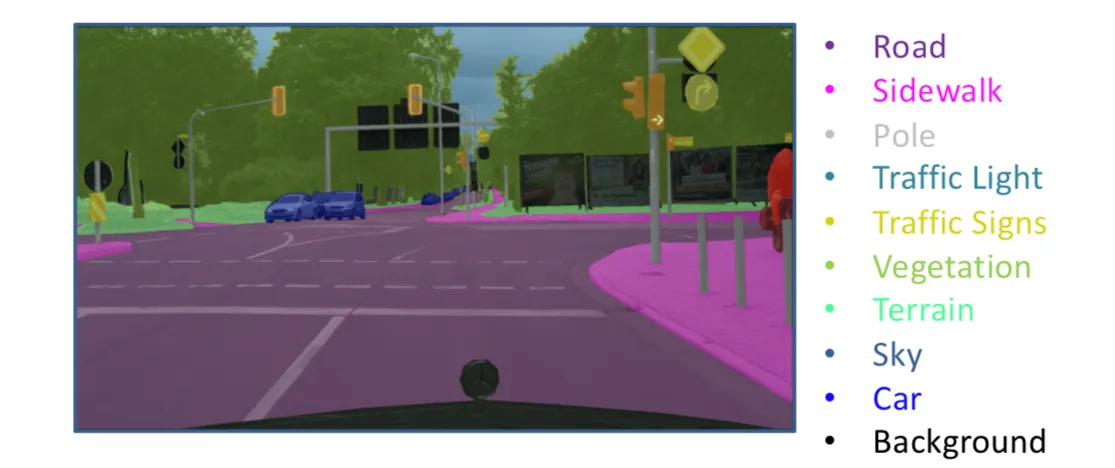

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

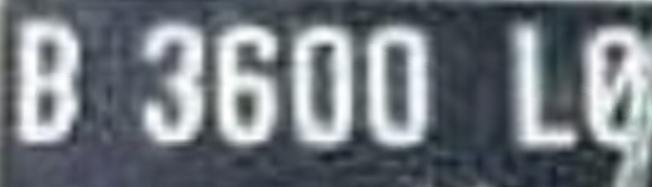

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

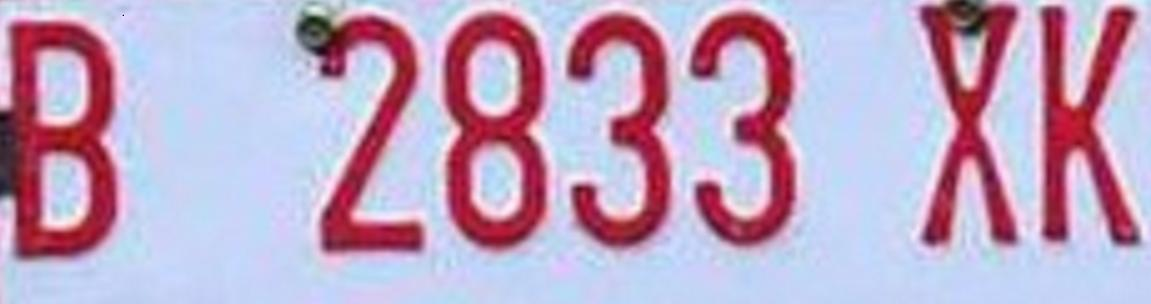

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

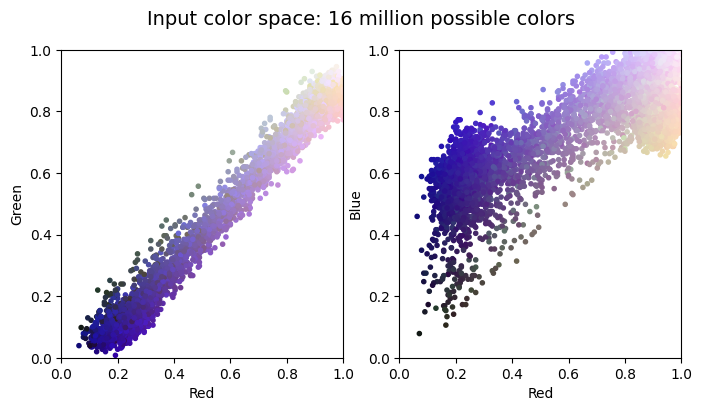

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

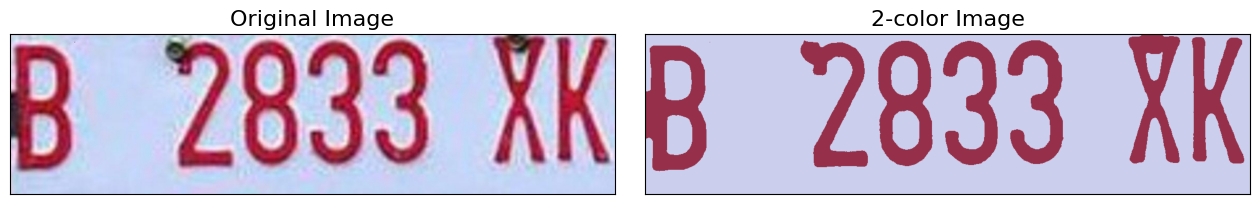

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Jawaban

### Import Library

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pytesseract
from sklearn.cluster import MiniBatchKMeans

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (9,989 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

### Load Dataset

In [ ]:
# Path ke folder yang berisi gambar
folder_path = 'dataset/'

# Mendapatkan daftar file dalam folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

### Preprocessing Data

#### Kmeans clustering untuk mengubah warna

In [ ]:
def change_color(image):
    h, w, ch = image.shape
    data = image.astype(np.float32) / 255.0
    data = data.reshape(h * w, ch)

    kmeans = MiniBatchKMeans(2)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    recolored = (new_colors.reshape(h, w, ch) * 255).astype(np.uint8)

    return recolored

#### Threshold untuk mengubah warna menjadi binary (hitam & putih)

In [ ]:
def enhance_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    if np.mean(thresh) > 128:  # Logika if untuk memastikan bahwa angka menjadi putih dan background menjadi hitam
        thresh = cv2.bitwise_not(thresh)

    return thresh

#### Denoising menggunakan medianBlur

In [ ]:
def remove_noise(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

#### Invert Color

In [ ]:
def invert_colors(image):
    return cv2.bitwise_not(image)

### Segmentasi Gambar

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


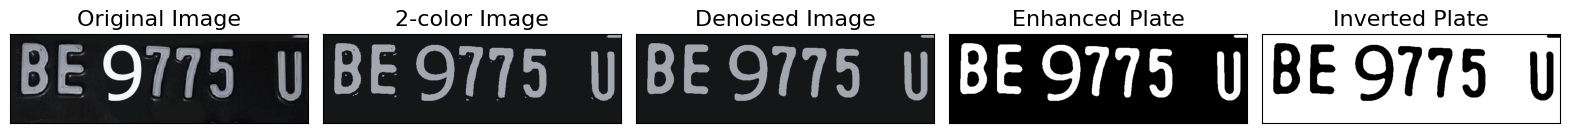

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


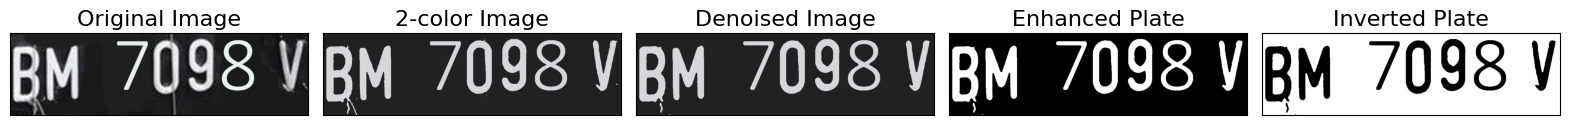

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


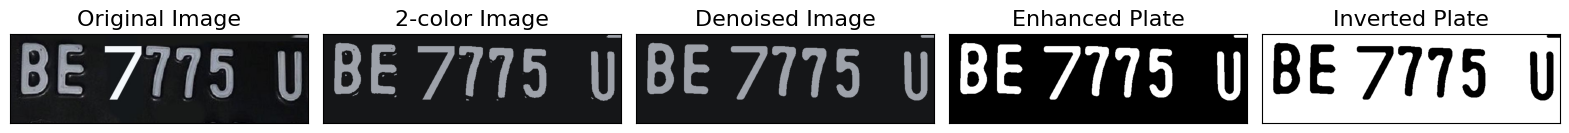

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


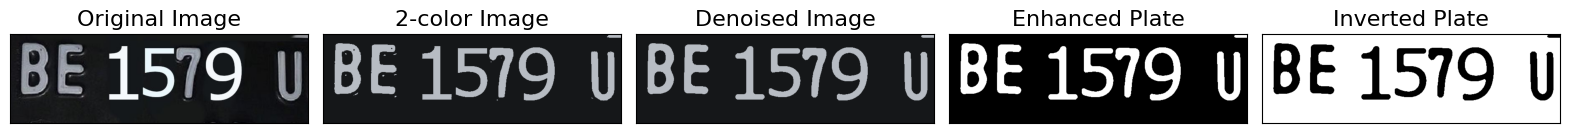

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


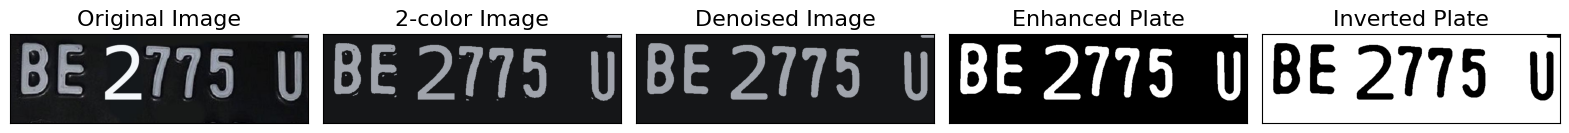

In [ ]:
for i, file_name in enumerate(file_names):
    image_path = os.path.join(folder_path, file_name)
    img = cv2.imread(image_path)

    recolored = change_color(img)
    denoised_image = remove_noise(recolored, kernel_size=9)
    enhanced_plate = enhance_plate(denoised_image)
    inverted_plate = invert_colors(enhanced_plate)

    # Menampilkan gambar asli, gambar dengan warna diubah, hasil setelah menghilangkan noise, dan hasil akhir setelah meningkatkan kejelasan nomor plat
    fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
    ax[1].set_title('2-color Image', size=16)
    ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Denoised Image', size=16)
    ax[3].imshow(enhanced_plate, cmap='gray')
    ax[3].set_title('Enhanced Plate', size=16)
    ax[4].imshow(inverted_plate, cmap='gray')
    ax[4].set_title('Inverted Plate', size=16)
    plt.show()

### Evaluasi Menggunakan pytesseract

In [ ]:
def extract_text(image):
    return pytesseract.image_to_string(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


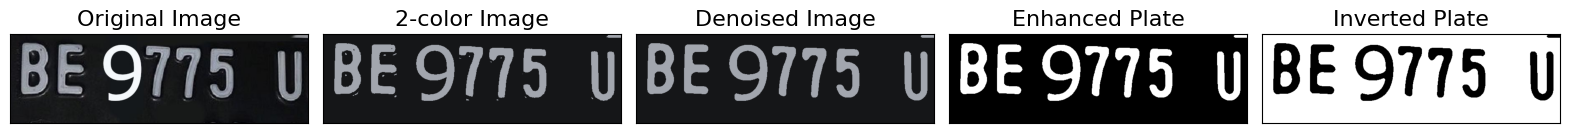

Hasil ekstraksi teks dari BE9775U.jpg:
BE 9775 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


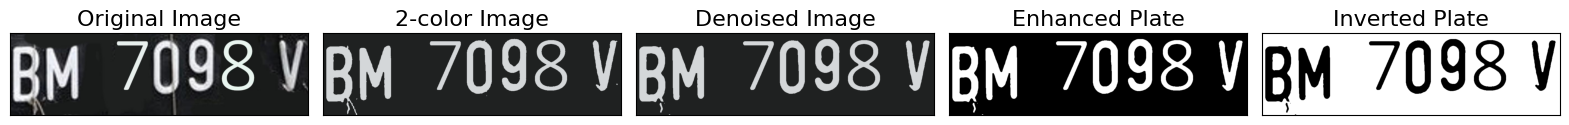

Hasil ekstraksi teks dari BM7098V.jpg:
BM 7098 V



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


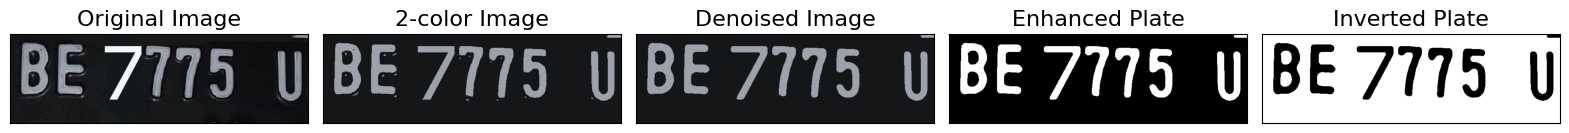

Hasil ekstraksi teks dari BE7775U.jpg:
BE 7775 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


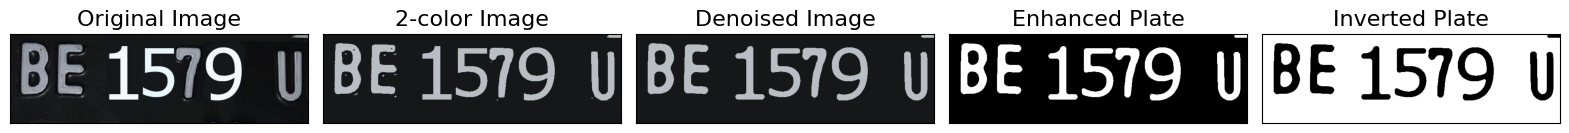

Hasil ekstraksi teks dari BE1579U.jpg:
BE 1579 U



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


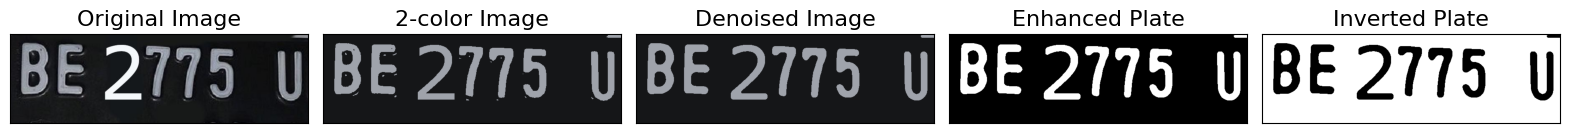

Hasil ekstraksi teks dari BE2775U.jpg:
BE 2775 U



In [ ]:
for i, file_name in enumerate(file_names):
  image_path = os.path.join(folder_path, file_name)
  img = cv2.imread(image_path)

  recolored = change_color(img)
  denoised_image = remove_noise(recolored, kernel_size=9)
  enhanced_plate = enhance_plate(denoised_image)
  inverted_plate = invert_colors(enhanced_plate)
  extracted_text = extract_text(inverted_plate)

  fig, ax = plt.subplots(1, 5, figsize=(20, 6), subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(cv2.cvtColor(recolored, cv2.COLOR_BGR2RGB))
  ax[1].set_title('2-color Image', size=16)
  ax[2].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
  ax[2].set_title('Denoised Image', size=16)
  ax[3].imshow(enhanced_plate, cmap='gray')
  ax[3].set_title('Enhanced Plate', size=16)
  ax[4].imshow(inverted_plate, cmap='gray')
  ax[4].set_title('Inverted Plate', size=16)
  plt.show()
  print(f"Hasil ekstraksi teks dari {file_name}:")
  print(extracted_text)